In [12]:
#!python -m pip install seaborn
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 16})

# Model and Incentive Comparison
This script is used to visualize the results obtained by the model and incentive comparison for differently trained models. Further discussion on the results can be found in the report chapter 4.2.

In [34]:
def generate_plot(files,title, show_legend=False):
    results = pd.read_csv(files[0]).T
    results['step'] = range(results.shape[0])

    results_2 = pd.read_csv(files[1]).T
    results_2['step'] = range(results_2.shape[0])
    results_2_value = pd.melt(results_2,id_vars='step').drop(['variable'],axis=1)['value']

    results_3 = pd.read_csv(files[2]).T
    results_3['step'] = range(results_3.shape[0])
    results_3_value = pd.melt(results_3,id_vars='step').drop(['variable'],axis=1)['value']

    df = pd.melt(results,id_vars='step').drop('variable',axis=1)
    df['experiment 2'] = results_2_value
    df['experiment 3'] = results_3_value
    
    df.columns = ['step','PPO','A2C','DQN']

    fig = sns.lineplot(x='step', y='value', hue='variable', 
                data=pd.melt(df, ['step'])
                  )
    fig.set_title(title)
    fig.set(xlabel='Steps')
    fig.set(ylabel='Minerals Collected')
    fig.set_ylim([0,1050])
    fig.set_xlim([-10,240])
    if show_legend:
        fig.legend(title='Experiments')
    else:
        fig.get_legend().remove()
    plt.tight_layout()
    fig = fig.get_figure()
    title = title.replace('\n', '')
    title = title.replace('&', 'and')
    fig.savefig(f'{title}.pdf')

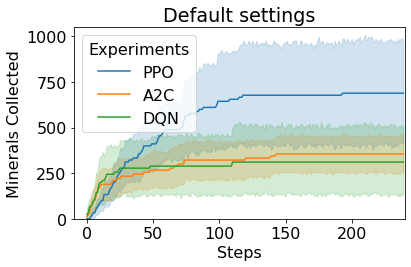

In [24]:
files = ['experiment_1_PPO_step_results.csv',
         'experiment_2_A2C_step_results.csv',
         'experiment_3_DQN_step_results.csv'
        ]

generate_plot(files,'Default settings', show_legend=True)

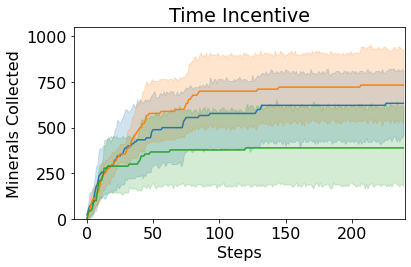

In [25]:
files = ['experiment_4_PPO_step_results.csv',
         'experiment_5_A2C_step_results.csv',
         'experiment_6_DQN_step_results.csv'
        ]
generate_plot(files,'Time Incentive')

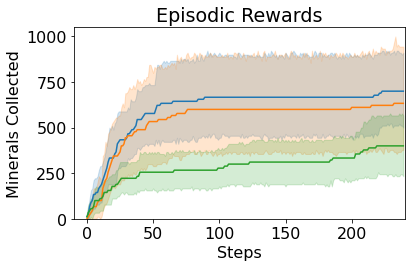

In [26]:
files = ['experiment_7_PPO_step_results.csv',
         'experiment_8_A2C_step_results.csv',
         'experiment_9_DQN_step_results.csv'
        ]
generate_plot(files,'Episodic Rewards')

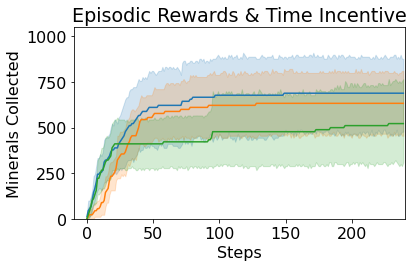

In [35]:
files = ['experiment_10_PPO_step_results.csv',
         'experiment_11_A2C_step_results.csv',
         'experiment_12_DQN_step_results.csv'
        ]
generate_plot(files,'Episodic Rewards & Time Incentive')

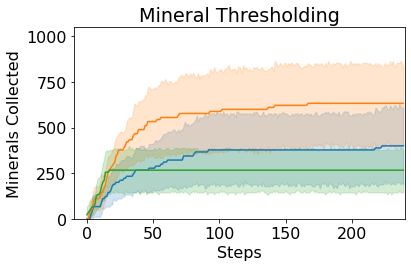

In [28]:
files = ['experiment_13_PPO_step_results.csv',
         'experiment_14_A2C_step_results.csv',
         'experiment_15_DQN_step_results.csv'
        ]
generate_plot(files,'Mineral Thresholding')

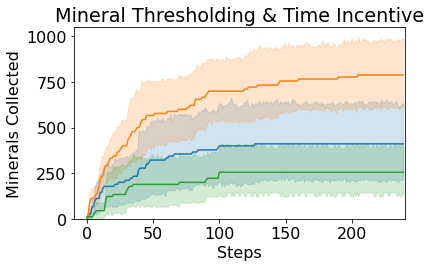

In [36]:
files = ['experiment_16_PPO_step_results.csv',
         'experiment_17_A2C_step_results.csv',
         'experiment_18_DQN_step_results.csv'
        ]
generate_plot(files,'Mineral Thresholding & Time Incentive')

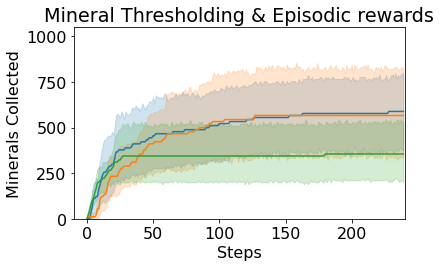

In [37]:
files = ['experiment_19_PPO_step_results.csv',
         'experiment_20_A2C_step_results.csv',
         'experiment_21_DQN_step_results.csv'
        ]
generate_plot(files,'Mineral Thresholding & Episodic rewards')

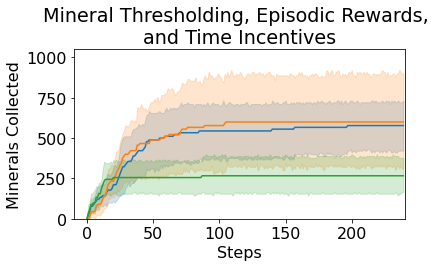

In [31]:
files = ['experiment_22_PPO_step_results.csv',
         'experiment_23_A2C_step_results.csv',
         'experiment_24_DQN_step_results.csv'
        ]
generate_plot(files,'Mineral Thresholding, Episodic Rewards, \nand Time Incentives')

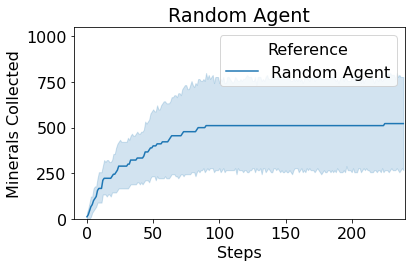

In [33]:
files = ['experiment_000_RANDOM_step_results.csv'
        ]
results = pd.read_csv(files[0]).T
results['step'] = range(results.shape[0])

df = pd.melt(results,id_vars='step').drop('variable',axis=1)
df.columns = ['step','Random Agent']
fig = sns.lineplot(x='step', y='value', hue='variable', 
            data=pd.melt(df, ['step']))
fig.set_title('Random Agent')
fig.set(xlabel='Steps')
fig.set(ylabel='Minerals Collected')
fig.legend(title='Reference',loc='upper right')

fig.set_ylim([0,1050])
fig.set_xlim([-10,240])

plt.tight_layout()
fig = fig.get_figure()
fig.savefig(f'Random_Agent.pdf')